In [1]:
#pip install pyod
#pip install sklearn
#pip install tensorflow
import anomaly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def get_data(f_name):
    
    if f_name == 'Deloitte_KX_OpenData_Contact List_03 Aug 2020.csv':
        df_raw = pd.read_csv(f_name, keep_default_na = False, na_values = 'NaN')
        x_cols = ['First Name', 'Last Name', 'Address Line 1']
        
        ##Test injection
        df_test = pd.DataFrame([['John', 'Carter', '1 Queen Street'], 
                     ['Johhnn', 'Carteerr', '1111111 Sort Of Wrong Address']], columns=x_cols)
        df_raw = pd.concat([df_raw, df_test])
        ##end of test injection
    
    elif f_name == 'aloi-unsupervised-ad.csv':
        #Harvard Dataverse>Unsupervised Anomaly Detection Dataverse>Unsupervised Anomaly Detection Benchmark>
        # aloi-unsupervised-ad.tab
        #https://doi.org/10.7910/DVN/OPQMVF/7VDJBV, Harvard Dataverse, V1, UNF:6:IkCoNEXH+d/YfqLkZQ0NVw== [fileUNF]

        df_raw = pd.read_csv(f_name, header = None)
        df_raw.rename({df_raw.columns[-1] : 'label'}, axis = 'columns', inplace = True)  
        df_raw.loc[df_raw.label == 'o', 'label'] = 1
        df_raw.loc[df_raw.label == 'n', 'label'] = 0

        df_raw['label'] = df_raw['label'].astype(bool)

        x_cols = df_raw.columns[0:-1]    

    elif f_name == 'SMSSpamCollection':
        import csv
        #http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
        df_raw = pd.read_csv(f_name, sep = '\t', quoting=csv.QUOTE_NONE, header = None)
        df_raw.rename({df_raw.columns[0] : 'label'}, axis = 'columns', inplace = True)  
        df_raw.loc[df_raw.label == 'spam', 'label'] = 1
        df_raw.loc[df_raw.label == 'ham', 'label'] = 0

        df_raw['label'] = df_raw['label'].astype(bool)

        x_cols = df_raw.columns[1:]
    
    elif f_name == 'generate data':
        #generated data
        from pyod.utils.data import generate_data
        X_train, _, y_train, _ = generate_data(n_train=10000,
                                               n_test=0,
                                               n_features=20,
                                               contamination=0.02,
                                               behaviour ='new',
                                               random_state=84)
        df_raw = pd.DataFrame(X_train)
        df_raw['label'] = y_train.astype(bool)
        x_cols = df_raw.columns[0:-1]
        
    elif f_name == 'generate clusters':
        #generated clusters
        from pyod.utils.data import  generate_data_clusters
        X_train, _, y_train, _ =  generate_data_clusters(n_train=10000,
                                                         n_clusters=15,
                                                         n_test=10,
                                                         n_features=20,
                                                         size ='different',
                                                         density = 'different',
                                                         return_in_clusters =False,
                                                         contamination=0.01,
                                                         random_state=126)
        df_raw = pd.DataFrame(X_train)
        df_raw['label'] = y_train.astype(bool)
        x_cols = df_raw.columns[0:-1]
        
    return df_raw, x_cols

In [3]:
#df_raw, x_cols = get_data('Deloitte_KX_OpenData_Contact List_03 Aug 2020.csv')
#df_raw, x_cols = get_data('aloi-unsupervised-ad.csv')
df_raw, x_cols = get_data('SMSSpamCollection')
#df_raw, x_cols = get_data('generate data')
#df_raw, x_cols = get_data('generate clusters')

random_state = np.random.RandomState(42)

df = df_raw[x_cols].sample(frac=1)

anom = anomaly.Anomaly()

if df.select_dtypes(include=[object]).shape[1] > 0: #has text values
    x, y = anom.text_process(df) #process text
    print(f'shape = {x.shape}')
    score_by_aom, score_by_moa, score_by_max, score_by_avg, all_scores, all_scores_norm \
                    = anom.fit(x, quick_methods = True, slow_methods= False, nn_methods = False, 
                               random_state = random_state, verbose = 0)
else:
    x = df.to_numpy()
    print(f'shape = {x.shape}')
    score_by_aom, score_by_moa, score_by_max, score_by_avg, all_scores, all_scores_norm \
                    = anom.fit(x, quick_methods = True, slow_methods= True, nn_methods = False, 
                               use_score_rank = True,
                               random_state = random_state, verbose = 0)


2020-11-03 09:38:42+13:00 : num_col=1, len_col=160
shape = (5574, 1, 160)
2020-11-03 09:38:42+13:00 : zero columns shrinked
2020-11-03 09:38:42+13:00 : used MaxAbsScaler() data scaler
2020-11-03 09:38:42+13:00 : n_rows = 5574, n_features = 160
2020-11-03 09:38:42+13:00 : 1 - fitting PCA_randomized
2020-11-03 09:38:42+13:00 : Base detector 1/15 is fitted for prediction
2020-11-03 09:38:42+13:00 : 2 - fitting PCA_full
2020-11-03 09:38:43+13:00 : Base detector 2/15 is fitted for prediction
2020-11-03 09:38:43+13:00 : 3 - fitting COPOD
2020-11-03 09:38:43+13:00 : Base detector 3/15 is fitted for prediction
2020-11-03 09:38:43+13:00 : 4 - fitting HBOS
2020-11-03 09:38:45+13:00 : Base detector 4/15 is fitted for prediction
2020-11-03 09:38:45+13:00 : 5 - fitting HBOS_200
2020-11-03 09:38:45+13:00 : Base detector 5/15 is fitted for prediction
2020-11-03 09:38:45+13:00 : 6 - fitting HBOS_300
2020-11-03 09:38:45+13:00 : Base detector 6/15 is fitted for prediction
2020-11-03 09:38:45+13:00 : 7 -

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


2020-11-03 09:38:56+13:00 : Base detector 13/15 is fitted for prediction
2020-11-03 09:38:56+13:00 : 14 - fitting CBLOF_24


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


2020-11-03 09:38:58+13:00 : Base detector 14/15 is fitted for prediction
2020-11-03 09:38:58+13:00 : 15 - fitting CBLOF_32


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


2020-11-03 09:38:59+13:00 : Base detector 15/15 is fitted for prediction
2020-11-03 09:38:59+13:00 : total scores = 15


Text(0, 0.5, 'number of messages')

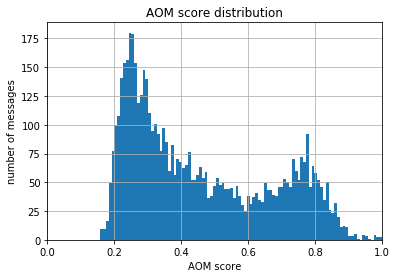

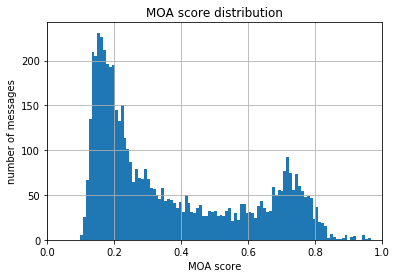

In [4]:
df['aom_score'] = score_by_aom
df['moa_score'] = score_by_moa
df['aommoa_score'] = np.mean([score_by_aom, score_by_moa], axis=0)

df['max_score'] = score_by_max
df['avg_score'] = score_by_avg      

    
for i in range(1, all_scores_norm.shape[1]+1):
    df['score_'+str(i)] = all_scores_norm[:, i-1]

df.hist(column = 'aom_score', bins = 100)[0][0].set_xlim((0,1))
plt.title ('AOM score distribution')
plt.xlabel ('AOM score')
plt.ylabel ('number of messages')
df.hist(column = 'moa_score', bins = 100)[0][0].set_xlim((0,1))
plt.title ('MOA score distribution')
plt.xlabel ('MOA score')
plt.ylabel ('number of messages')

In [5]:
if 'label' in df_raw.columns:
    from sklearn.metrics import roc_auc_score
    df['label']=df_raw['label']
    cnt = sum(df['label'] == 1) 
    print(f'true number of outliers = {cnt}')
else:
    cnt = 100
pd.set_option('display.max_rows', cnt)

df.sort_values('aom_score', ascending=False)[0:cnt]

true number of outliers = 747


,1,aom_score,moa_score,aommoa_score,max_score,avg_score,score_1,score_2,score_3,score_4,...,score_7,score_8,score_9,score_10,score_11,score_12,score_13,score_14,score_15,label
1249,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,0.999858,0.966315,0.983087,1.000000,0.940568,0.999811,0.999811,0.932148,0.946926,...,0.899675,0.989187,1.000000,0.857742,0.954016,0.902195,0.920020,0.950665,0.972199,False
3939,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...,0.993745,0.952181,0.972963,1.000000,0.944578,1.000000,1.000000,0.962937,0.951518,...,0.908181,0.972859,0.879097,0.905401,0.991928,0.974981,0.941729,0.902900,0.947315,False
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,0.989173,0.946103,0.967638,0.998446,0.920421,0.968319,0.968319,0.921171,0.917471,...,0.716529,0.960800,0.830839,0.884831,0.998446,0.991483,0.952756,0.950430,0.974041,True
2171,"""CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...",0.987597,0.966117,0.976857,1.000000,0.945538,0.962483,0.962483,0.982574,1.000000,...,0.927445,1.000000,0.799111,0.908920,0.975195,0.998063,0.894384,0.870430,0.901983,False
5083,"""HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VI...",0.979966,0.944297,0.962132,0.988723,0.906431,0.959476,0.959476,0.910234,0.912641,...,0.806808,0.790597,0.790464,0.855092,0.946076,0.912178,0.951460,0.985833,0.988723,False
3312,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,0.978947,0.940742,0.959845,1.000000,0.916909,0.997772,0.997772,1.000000,0.952641,...,0.844358,0.919530,0.825722,0.902671,0.966984,0.919138,0.868353,0.826792,0.890083,False
3306,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...,0.976670,0.912382,0.944526,1.000000,0.887881,0.906678,0.906678,0.850933,0.837861,...,0.722866,0.717291,0.881548,1.000000,1.000000,0.990149,1.000000,1.000000,1.000000,False
1893,CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...,0.976268,0.945864,0.961066,1.000000,0.927230,0.935783,0.935783,0.939370,0.972874,...,0.889122,0.881481,0.844526,0.896099,0.970775,1.000000,0.912588,0.905423,0.902646,True
4318,HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HO...,0.961345,0.907240,0.934292,0.966502,0.883575,0.966502,0.966502,0.935280,0.953317,...,0.822597,0.945874,0.794967,0.890510,0.920783,0.862067,0.798829,0.801304,0.829216,False
1407,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",0.956045,0.914112,0.935078,0.998030,0.876120,0.928258,0.928258,0.890737,0.959733,...,0.776536,0.847200,0.691576,0.921470,0.918469,0.998030,0.793167,0.750279,0.801747,True


label 1 cnt = 747
label 0 cnt = 4827


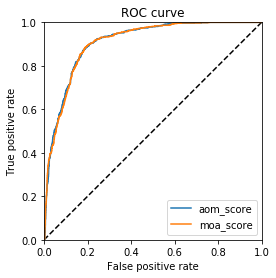

aom_score
421
roc_auc=0.9084367301399509
moa_score
419
roc_auc=0.9073853594059964
aommoa_score
421
roc_auc=0.9083929114704797
max_score
415
roc_auc=0.903759641840617
avg_score
412
roc_auc=0.9085717914819279
score_1
429
roc_auc=0.907491578079461
score_2
429
roc_auc=0.907491578079461
score_3
379
roc_auc=0.8983429054939459
score_4
353
roc_auc=0.8882141368457048
score_5
378
roc_auc=0.9044597698854253
score_6
378
roc_auc=0.9041483245321592
score_7
383
roc_auc=0.8334355306732074
score_8
426
roc_auc=0.8852536033228974
score_9
428
roc_auc=0.9006392256409104
score_10
389
roc_auc=0.8988953535293027
score_11
406
roc_auc=0.9016758977072575
score_12
383
roc_auc=0.89721942808871
score_13
458
roc_auc=0.9160445386268505
score_14
450
roc_auc=0.913510266464657
score_15
445
roc_auc=0.913728250478608


In [6]:
if 'label' in df_raw.columns:
    %matplotlib inline

    df['label']=df_raw['label']
    cnt = sum(df['label'] == 1) 
    print(f'label 1 cnt = {cnt}')
    print(f'label 0 cnt = {sum(df["label"] == 0)}')
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plt.plot([0, 1], [0, 1], 'k--')
    fpr, tpr, _ = metrics.roc_curve(df.label, df['aom_score'])
    plt.plot(fpr, tpr, label='aom_score')
    fpr, tpr, _ = metrics.roc_curve(df.label, df['moa_score'])
    plt.plot(fpr, tpr, label='moa_score')
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.show()

    for col in df.columns: 
        if 'score' in str(col):
            print(col)
            print(sum(df.sort_values(col, ascending=False)[0:cnt].label==1))
            print(f'roc_auc={roc_auc_score(df.label, df[col])}')
